# Importing libraries, ords_prods_custs_final & checking outcome

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path=r'/Users/stefaniadaskalaki/Google Drive/CF4.2 Instacart Basket Analysis'

In [4]:
df_ords_prods_custs_final=pd.read_pickle(os.path.join(path, '02. Data', '02. Prepared Data', 'ords_prods_custs_final.pkl'))

In [5]:
# changing data types to reduce memory usage 

df_ords_prods_custs_final['order_day_of_week'] = df_ords_prods_custs_final['order_day_of_week'].astype(str)

df_ords_prods_custs_final['order_hour_of_day'] = df_ords_prods_custs_final['order_hour_of_day'].astype(str)

df_ords_prods_custs_final['order_number'] = df_ords_prods_custs_final['order_number'].astype(int)

In [50]:
df_ords_prods_custs_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   order_id                     object  
 1   user_id                      object  
 2   order_number                 int64   
 3   order_day_of_week            object  
 4   order_hour_of_day            object  
 5   days_since_prior_order       float32 
 6   new_customer                 bool    
 7   product_id                   object  
 8   add_to_cart_order            int16   
 9   reordered                    int8    
 10  product_name                 object  
 11  aisle_id                     object  
 12  department_id                object  
 13  prices                       float32 
 14  price_range_loc              object  
 15  Busiest_day                  object  
 16  Busiest_days                 object  
 17  busiest_period_of_day        object  
 18  max_order           

In [6]:
## downcasting loop

for column in df_ords_prods_custs_final:
    if df_ords_prods_custs_final[column].dtype == "float64":
        df_ords_prods_custs_final[column]=pd.to_numeric(df_ords_prods_custs_final[column], downcast="float")
    if df_ords_prods_custs_final[column].dtype == "int64":
        df_ords_prods_custs_final[column]=pd.to_numeric(df_ords_prods_custs_final[column], downcast="integer")

In [52]:
df_ords_prods_custs_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   order_id                     object  
 1   user_id                      object  
 2   order_number                 int8    
 3   order_day_of_week            object  
 4   order_hour_of_day            object  
 5   days_since_prior_order       float32 
 6   new_customer                 bool    
 7   product_id                   object  
 8   add_to_cart_order            int16   
 9   reordered                    int8    
 10  product_name                 object  
 11  aisle_id                     object  
 12  department_id                object  
 13  prices                       float32 
 14  price_range_loc              object  
 15  Busiest_day                  object  
 16  Busiest_days                 object  
 17  busiest_period_of_day        object  
 18  max_order           

In [53]:
# setting wide option display for df and checking outcome

pd.set_option('display.max_columns', 50)

In [54]:
df_ords_prods_custs_final.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,Busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,frequency_order_median,frequency_order_median_flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,exists
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


### Creating crosstab & histograms for days_since_prior_order / order_number

In [15]:
crosstab_days_order = pd.crosstab(df_ords_prods_custs_final['days_since_prior_order'], df_ords_prods_custs_final['order_number'], dropna = False)

In [16]:
# copying to clipboard

crosstab_days_order.to_clipboard()

<function matplotlib.pyplot.show(close=None, block=None)>

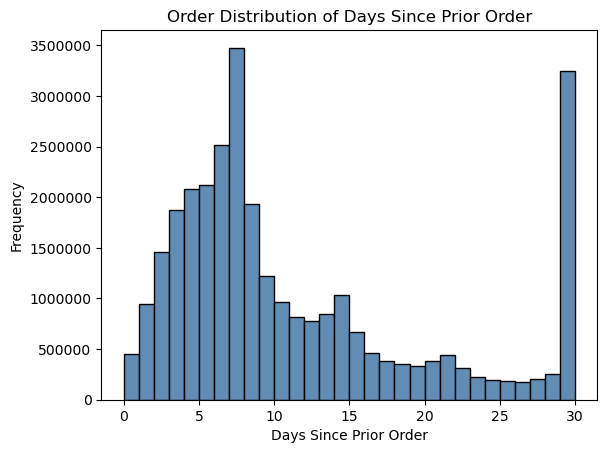

In [7]:
# creating a histogram to show the distribution of number of days since last customer order

hist_days_since_prior_ord=df_ords_prods_custs_final['days_since_prior_order'].plot.hist(bins = 30, edgecolor = "black", color = '#618CB4')
plt.xlabel('Days Since Prior Order')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Order Distribution of Days Since Prior Order')
plt.show

In [28]:
# Exporting chart

hist_days_since_prior_ord.figure.savefig(os.path.join(path, '04. Analysis', '01. Visualisations', 'hist_days_last_order.png'))

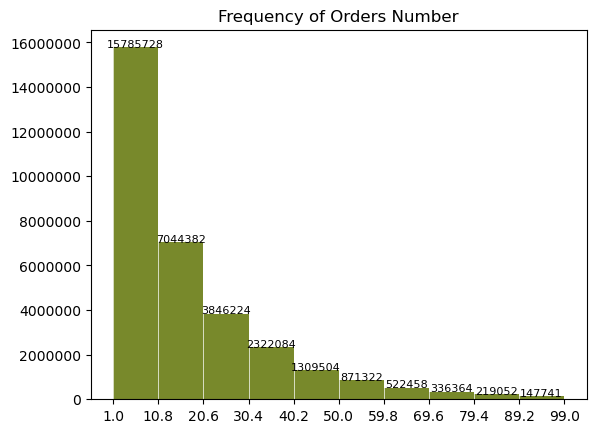

In [8]:
# Creating and exporting histogram to see the frequency of the orders' number

hist_freq_ord_number=n, bins, patches = plt.hist(df_ords_prods_custs_final['order_number'])
bins

plt.xticks(bins)
plt.grid(color='white', lw = 0.5, axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Frequency of Orders Number', loc = 'center', fontsize = 12)
plt.hist(df_ords_prods_custs_final['order_number'],color='#78892B')
# x ticks labels
[ "{:.2f} - {:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]

# x ticks positions
[(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]

# x ticks
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]

# plot values on top of bars
for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+5, int(value), ha='center', fontsize = 8)

# Exporting chart

hist_freq_ord_number=plt.savefig(os.path.join(path, '04. Analysis', '01. Visualisations', 'hist_freq_ord_number.png'))

plt.show()